## Example 5 - A Consumption-Savings Problem with Random Income Shocks

An agent lives for 100 periods. They begin their life with wealth $S_{-100}$.

Each day they choose an amount to eat of of their savings. Utility is 

$$U(c) = \log (c) $$

I.e., utility is increasing, concave (diminishing marginal returns), and $U(0) = -\infty$ (the agent must eat or die).

They get a rate of return $r > 0$ on savings. Their wealth evolves according to.

$$ S^{\prime} = (1 + r)S - C + Y$$

Where $Y$ is a period income shock satisfying 

$$\mathbb{P}(Y = 10) = \frac{1}{2} \quad\quad \mathbb{P}(Y = 0) = \frac{1}{2}$$


Set up the problem, solve for some reasonable parameters, simulate the process, and construct forecasts at each date for the future.

## Libraries

In [1]:
import numpy as np
import pandas as pd

from markov_decision_process import TimeAugmentedMDP

from rich import print
from rich.pretty import pprint

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
%matplotlib inline


import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

## Parameters

In [2]:
states: list[float] = np.linspace(0, 100, 101).tolist()  # Wealth levels
actions: list[float] = np.linspace(0, 100, 101).tolist()  # Consumption levels
times: list[int] = np.arange(-100, 1).tolist()  # Times

S_initial: float = 100  # Initial wealth
r = 0.0  # Interest rate

In [3]:
def reward(
    s_prime: pd.Series,
    s: pd.Series,
    a: pd.Series,
    t: pd.Series,
):
    """
    My reward is the log of whatever I consume, a.

    But we don't want -inf around, so replace them with -1e8.
    """

    return np.log(a) if a > 0 else -1e8


def transition(
    s_prime: pd.Series,
    s: pd.Series,
    a: pd.Series,
    t: pd.Series,
):
    """
    Transition function. 

    """
    if s_prime == s * (1 + r) - a:
        return 1
    
    return 0


### Solve

In [4]:
%%time
mdp = TimeAugmentedMDP(
    states=states,
    actions=actions,
    times=times,
    reward_function=reward,
    transition_function=transition,
    force_overwrite=True,
    mode='flexible'
)
mdp.solve()

INFO:markov_decision_process.time_augmented_mdp:State space augmented with time
INFO:markov_decision_process.time_augmented_mdp:Generating state space data...
INFO:markov_decision_process.time_augmented_mdp:No path provided. Saving to /tmp/state_space_data/
INFO:markov_decision_process.time_augmented_mdp:No data found on disk. Generating...
INFO:markov_decision_process.time_augmented_mdp:State space data generated and saved to disk
INFO:markov_decision_process.time_augmented_mdp:Generating rewards and transitions...


KeyboardInterrupt: 

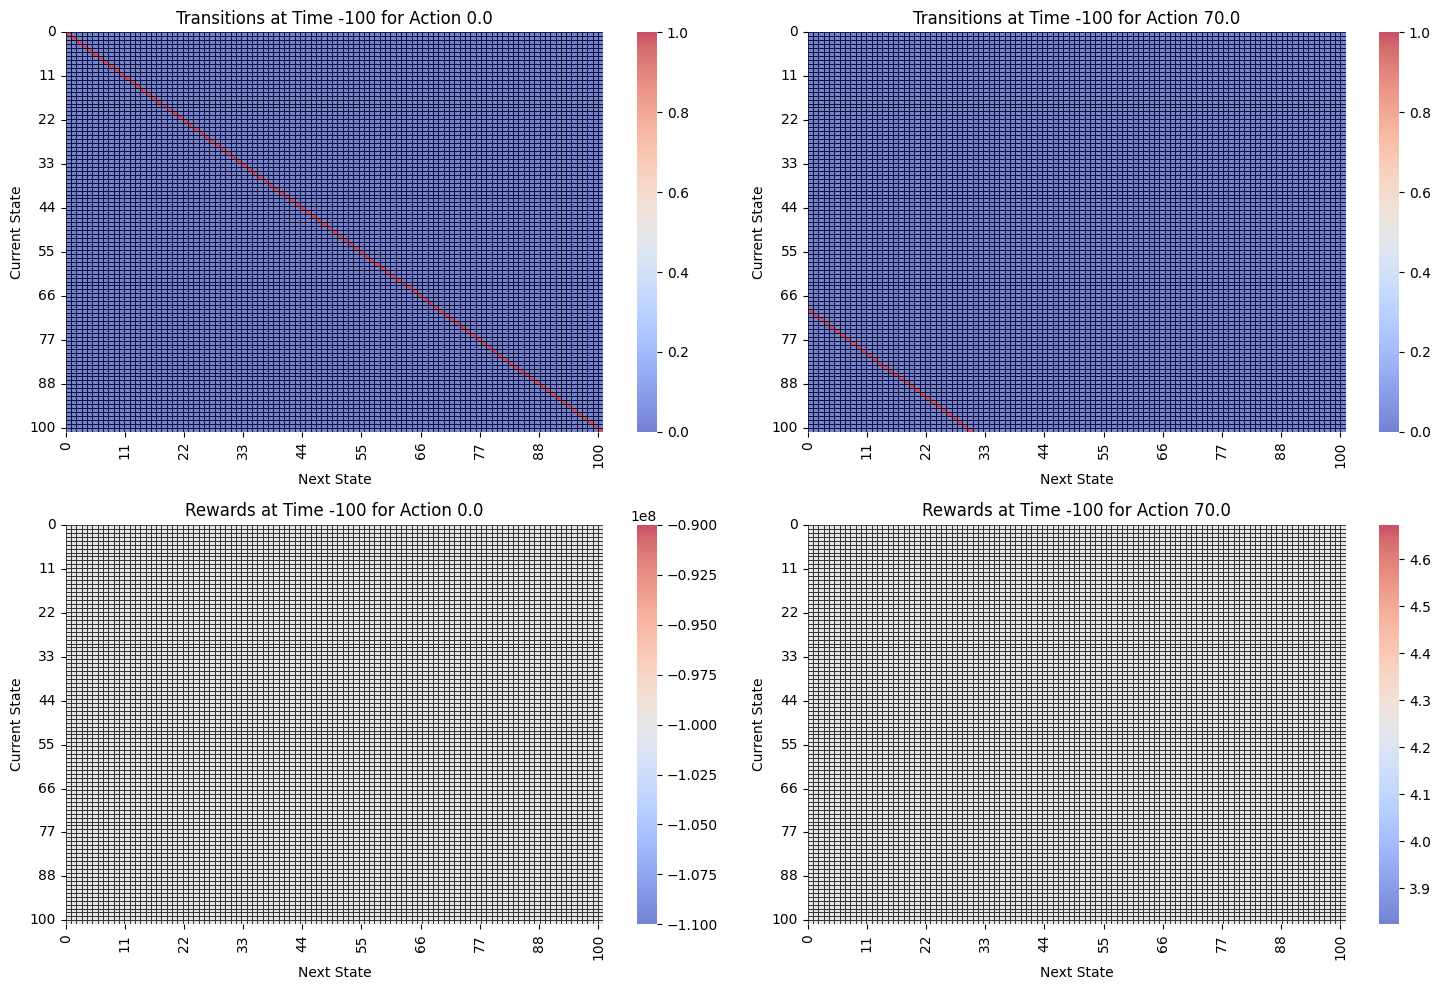

In [ ]:
period = -100

quantile_25 = np.quantile(mdp.actions, 0)
quantile_75 = np.quantile(mdp.actions, 0.75)
action1 = mdp.actions[np.abs(mdp.actions - quantile_25).argmin()]
action2 = mdp.actions[np.abs(mdp.actions - quantile_75).argmin()]


fig, ax = plt.subplots(2, 2, figsize=(15, 10))

mdp.plot_matrix(
    matrix_type="transitions",
    t=period,
    a=action1,
    ax=ax[0, 0],
)

mdp.plot_matrix(
    matrix_type="transitions",
    t=period,
    a=action2,
    ax=ax[0, 1],
)

mdp.plot_matrix(
    matrix_type="rewards",
    t=period,
    a=action1,
    ax=ax[1, 0],
)

mdp.plot_matrix(
    matrix_type="rewards",
    t=period,
    a=action2,
    ax=ax[1, 1],
)

# Only 10 labels at most for both x and y
for axis in ax.flatten():
    axis.set_xticks(np.linspace(0, 100, 10))
    axis.set_yticks(np.linspace(0, 100, 10))

    axis.set_xticklabels(np.linspace(0, 100, 10).astype(int))
    axis.set_yticklabels(np.linspace(0, 100, 10).astype(int))


plt.tight_layout()
plt.show()

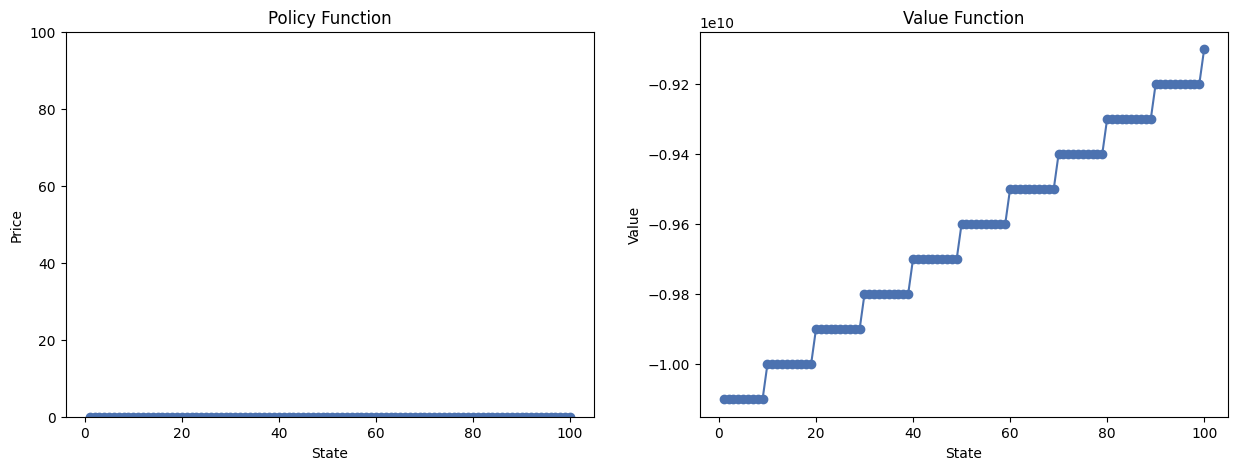

In [ ]:
# Plot the optimal policy

period = -100

x = mdp.policy_function[period].keys()
policy = mdp.policy_function[period].values()
value = mdp.value_function[period].values()

# Remove state 0
x = list(x)[1:]
policy = list(policy)[1:]
value = list(value)[1:]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(x, policy)
ax[0].plot(x, policy)
ax[0].set_title("Policy Function")
ax[0].set_xlabel("State")
ax[0].set_ylabel("Price")
ax[0].set_ylim(0, 100)

ax[1].scatter(x, value)
ax[1].plot(x, value)
ax[1].set_title("Value Function")
ax[1].set_xlabel("State")
ax[1].set_ylabel("Value")



plt.show()



